# Análise da Hipótese: preço x marca 

Nesta notebook é avaliado se há relação significativa entre o preço dos produtos e a marca a marca dos mesmos.

O objetivo é verificar se há marcas que tendem a ter maiores ou menores preços que outras em uma determinada categoria que as demais marcas do mesmo grupo de produtos.

## Preparação do ambiente de trabalho

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
arquivo_dados = '../data/processed/train_data_prep02.csv'
dados = pd.read_csv(arquivo_dados)

In [3]:
dados.head()

,name,category_1,category_2,category_3,item_condition_id,brand_name,price,shipping,item_description,date,stock
0,mlb cincinnati reds t shirt size xl,Men,Tops,T-shirts,3,No Brand,10.0,1,no description yet,18-6-2018,27
1,razer blackwidow chroma keyboard,Electronics,Computers & Tablets,Components & Parts,3,Razer,52.0,0,this keyboard is in great condition and works ...,18-3-2018,15
2,ava viv blouse,Women,Tops & Blouses,Blouse,1,Target,10.0,1,adorable top with a hint of lace and a key hol...,26-10-2018,14
3,leather horse statues,Home,Home Décor,Home Décor Accents,1,No Brand,35.0,1,new with tags leather horses retail for each s...,21-2-2018,1
4,24k gold plated rose,Women,Jewelry,Necklaces,1,No Brand,44.0,0,complete with certificate of authenticity,17-4-2018,13


## Avaliação

Número de marcas do dataset.

In [4]:
dados.brand_name.nunique()

4808

Como há 4.808 marcas diferentes no dataset a avaliação que se segue será feita considerando-se apenas as 10 marcas com a maior quantidade de anúncios do dataset.

Listagem das 10 marcas com maior quantidade de anúncios.

In [5]:
dados.brand_name.value_counts().head(10)

No Brand             632336
PINK                  54072
Nike                  54006
Victoria's Secret     48011
LuLaRoe               30995
Apple                 17314
FOREVER 21            15178
Nintendo              14998
Lululemon             14550
Michael Kors          13916
Name: brand_name, dtype: int64

In [16]:
dados.brand_name.value_counts(normalize=True).head(10)

No Brand             0.686634
PINK                 0.058715
Nike                 0.058643
Victoria's Secret    0.052134
LuLaRoe              0.033657
Apple                0.018801
FOREVER 21           0.016481
Nintendo             0.016286
Lululemon            0.015799
Michael Kors         0.015111
Name: brand_name, dtype: float64

In [17]:
brands = sorted(dados.brand_name.value_counts(normalize=True).head(10).index.to_numpy())

Seleção dos anúncios pertencentes as 10 marcas mais frequentes do dataset.

In [18]:
dados = dados[dados.brand_name.isin(brands)]
dados

,name,category_1,category_2,category_3,item_condition_id,brand_name,price,shipping,item_description,date,stock
0,mlb cincinnati reds t shirt size xl,Men,Tops,T-shirts,3,No Brand,10.0,1,no description yet,18-6-2018,27
3,leather horse statues,Home,Home Décor,Home Décor Accents,1,No Brand,35.0,1,new with tags leather horses retail for each s...,21-2-2018,1
4,24k gold plated rose,Women,Jewelry,Necklaces,1,No Brand,44.0,0,complete with certificate of authenticity,17-4-2018,13
5,bundled items requested for ruie,Women,Other,Other,3,No Brand,59.0,0,banana republic bottoms candies skirt with mat...,8-12-2018,6
8,girls nike pro shorts,Sports & Outdoors,Apparel,Girls,3,Nike,19.0,0,girls size small plus green three shorts total,12-4-2018,1
...,...,...,...,...,...,...,...,...,...,...,...
1481653,blk white ribbed mock neck bodysuit m,Women,Tops & Blouses,Blouse,1,No Brand,10.0,1,brand new black and white ribbed mock neck bod...,18-12-2018,1
1481654,victoria s secret tankini sz large,Women,Athletic Apparel,Sports Bras,2,Victoria's Secret,18.0,1,purple and paisley victoria s secret tankini s...,9-11-2018,33
1481658,day fix containers and eating plan,Sports & Outdoors,Exercise,Fitness accessories,2,No Brand,12.0,0,used once or twice still in great shape,7-10-2018,4
1481659,world markets lanterns,Home,Home Décor,Home Décor Accents,3,No Brand,45.0,1,there is of each one that you see so red orang...,21-5-2018,3


## Distribuição de preços entre as principais marcas

Text(0.5, 1.0, 'Distribuição dos preços por marca')

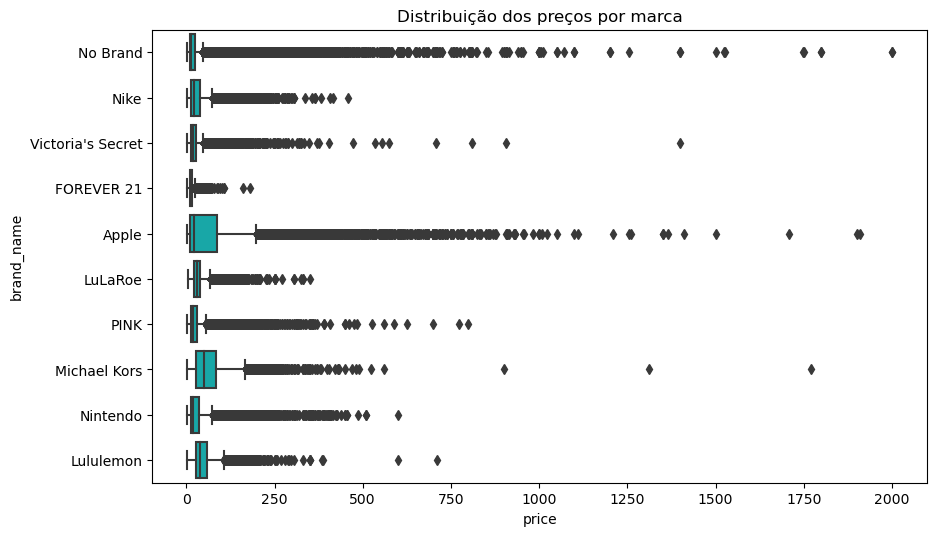

In [21]:
fig, ax = plt.subplots(1, figsize=(10, 6), dpi=100)
sns.boxplot(data=dados, y='brand_name', x='price', color='c', ax=ax)
plt.title('Distribuição dos preços por marca')

O gráfico a seguir mostra o mesmo conteúdo do gráfico anterior, porém sem a exibição do outliers. O que permite ver melhor a distribuição dos dos registros da maioria dos anúncios.

Text(0.5, 1.0, 'Distribuição dos preços por marca')

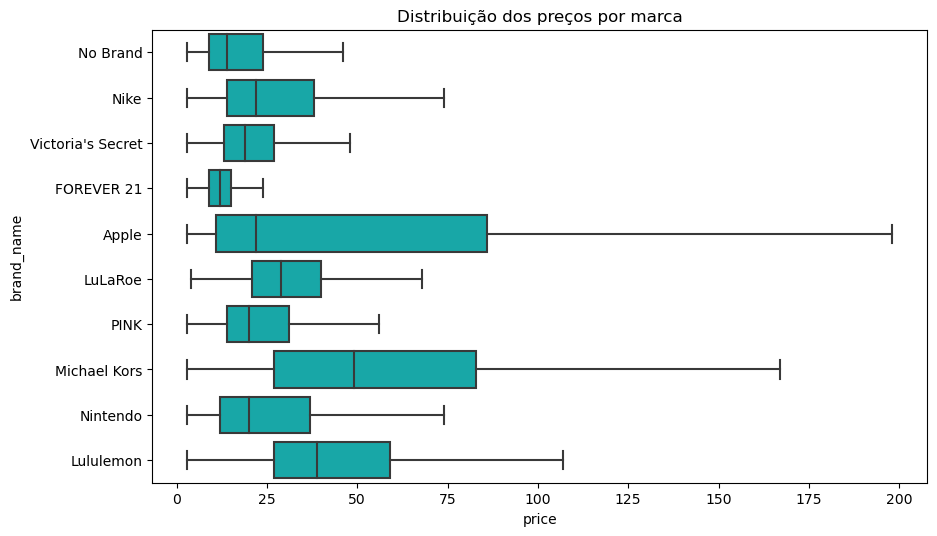

In [22]:
fig, ax = plt.subplots(1, figsize=(10, 6), dpi=100)
sns.boxplot(data=dados, y='brand_name', x='price', showfliers=False, color='c', ax=ax)
plt.title('Distribuição dos preços por marca')

É observado que as marcas notadamente artigos de luxo como `Apple` e `Michael Kors` apresentam maiores preços que as demais. Marcas como a `FOREVER 21` que trabalham com linhas de produtos mais populares apresentam, como esperado, os menores preços. 

Estes gráficos mostram que o peso do nome da marca pode influenciar no preço final dos produtos. Entretanto, parte desta diferença é devida a categorias dos produtos. Por exemplo, a `Apple` produz aparelhos teleônicos que, em geral, são mais caros que artigos do lar e vestuário. É necessário portanto, realizar uma análise mais detalhada sobre a influencia do nome da marca em produtos de mesmas categorias.

## Peso do nome da marca por categorias de produtos

Aqui serão avaliadas algumas categorias específicas que fornecem uma visão da característica geral dos produtos anúnciados. Esta escolha foi feita devido a grande quantidade de categorias existentes. As categorias utilizadas na análise a seguir foram escolhidas por serem as mais representativas das principais marcas listadas anteriormente.

### Preços das categoria Smartphones

Text(0.5, 1.0, 'Distribuição dos preços por marca para smartphones')

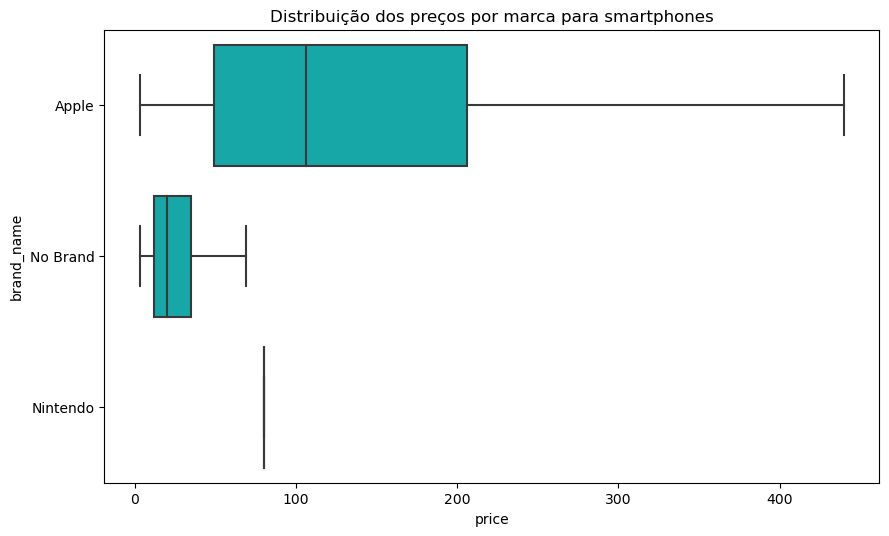

In [23]:
smartphones = dados.query('category_3 == "Cell Phones & Smartphones"')
fig, ax = plt.subplots(1, figsize=(10, 6), dpi=100)
sns.boxplot(data=smartphones, y='brand_name', x='price', showfliers=False, color='c', ax=ax)
plt.title('Distribuição dos preços por marca para smartphones')

Produtos da Apple, notadamente, têm preços maiores que outras categorias. A aparição da marca `Nintendo`, que não produz modelos de smartphone, mostra qe existem produtos no dataset erroneamente classificados em determinada categoria.

In [24]:
nintendo = dados.query('category_3 == "Cell Phones & Smartphones" & brand_name == "Nintendo"')
nintendo

,name,category_1,category_2,category_3,item_condition_id,brand_name,price,shipping,item_description,date,stock
1409450,like new,Electronics,Cell Phones & Accessories,Cell Phones & Smartphones,2,Nintendo,80.0,1,taking offers,21-7-2018,1


### Preços da categoria `Shoulder Bag` de produtos femininos

Text(0.5, 1.0, 'Distribuição de preços para bolsas de ombro femininas')

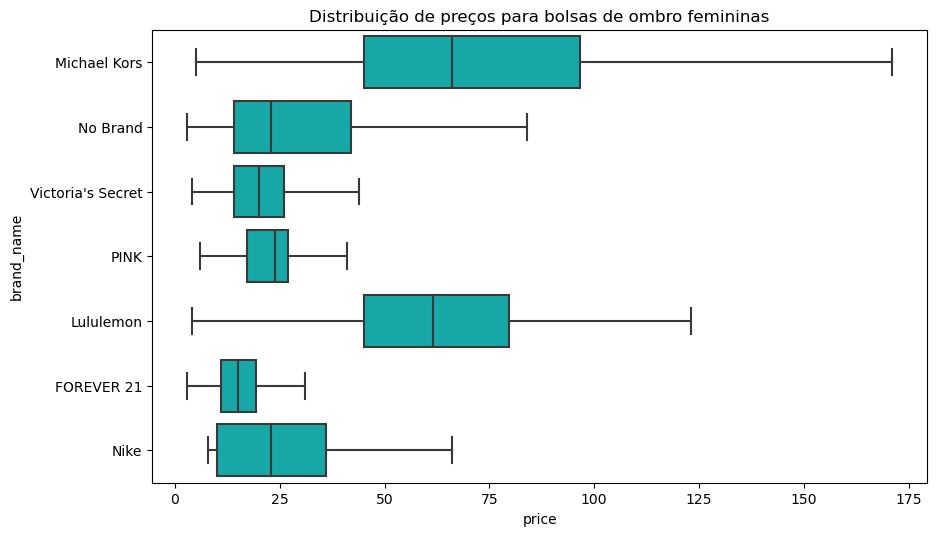

In [25]:
shoulder_bags = dados.query('category_1 == "Women" & category_3 == "Shoulder Bag"')
fig, ax = plt.subplots(1, figsize=(10, 6), dpi=100)
sns.boxplot(data=shoulder_bags, y='brand_name', x='price', showfliers=False, color='c', ax=ax)
plt.title('Distribuição de preços para bolsas de ombro femininas')

Como esperado, já que no primeiro gráfico a `Michael Kors` se destaca como uma marca de preços elevados a mesma é a de maiores preços nesta sub-categoria de produtos. Outra marca também de altos preços é a `Lululemon`. Novamente `Forever 21` aparece como a marca de menores preços médios.

### Preços para Tops e Bluses femininos

Text(0.5, 1.0, 'Distribuição dos preços para tops e blusas femininos')

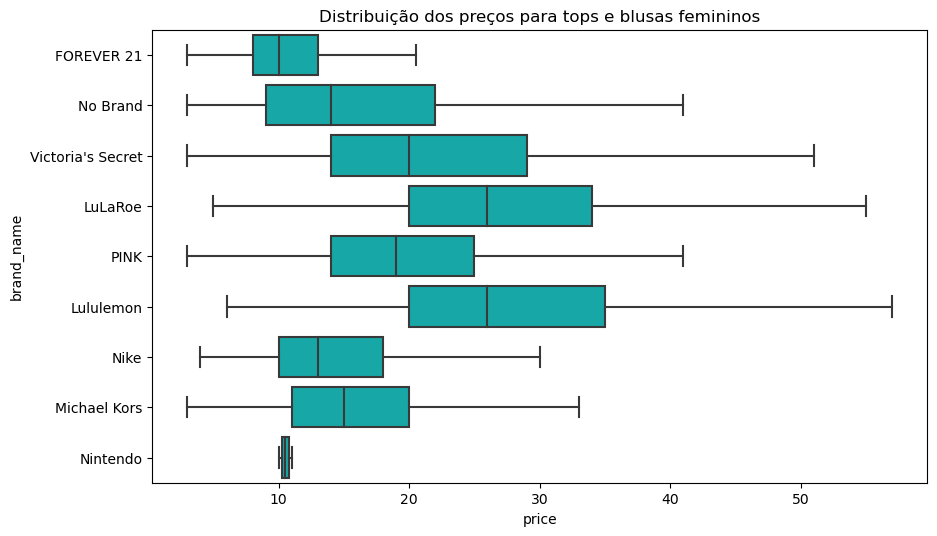

In [26]:
tops_blouses = dados.query('category_1 == "Women" & category_2 =="Tops & Blouses"')
fig, ax = plt.subplots(1, figsize=(10, 6), dpi=100)
sns.boxplot(data=tops_blouses, y='brand_name', x='price', showfliers=False, color='c', ax=ax)
plt.title('Distribuição dos preços para tops e blusas femininos')

A marca `Nintendo` aparece nesta categoria pois existem alguns produtos de vestuário que estampam o nome da marca, apenas 2 registros foram encontrados para este caso. Neste caso várias marcas apresentam distribuições similares de preços. Novamente a `FOREVER 21` apresrnta a distribuição de preços com os menores valores. 

### Preços para consoles de vídeo game

Text(0.5, 1.0, 'Distribuição dos preços para consoles de vídeo game')

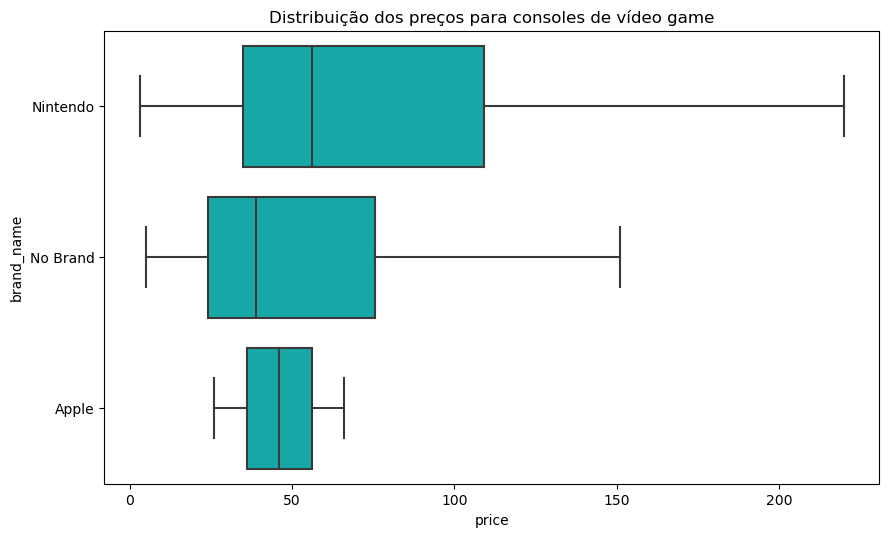

In [27]:
consoles = dados.query('category_3 == "Consoles"')
fig, ax = plt.subplots(1, figsize=(10, 6), dpi=100)
sns.boxplot(data=consoles, y='brand_name', x='price', showfliers=False, color='c', ax=ax)
plt.title('Distribuição dos preços para consoles de vídeo game')

In [28]:
consoles_apple = dados.query('category_3 == "Consoles" & brand_name == "Apple"')
consoles_apple

,name,category_1,category_2,category_3,item_condition_id,brand_name,price,shipping,item_description,date,stock
130211,chromecast,Electronics,Video Games & Consoles,Consoles,2,Apple,26.0,1,cast over shows easy setup box hasn t been ope...,10-6-2018,34
719341,brand new apple tv 32gb,Electronics,Video Games & Consoles,Consoles,1,Apple,66.0,0,only used for a couple days my dad doesn t hav...,22-4-2018,2


Nesta categoria apenas a marca `Nintendo` se apresenta. Produtos marcados como `No brand` também têm frequência significativa mas, neste caso é possível que existam produtos classificados erroneamente como é o caso do produtos `Apple`. Neste caso existem dois registros da Apple marcados como consoles de vídeo game. Porém, lendo-se as descrições mostradas acima, vê-se que estes produtos na verdade foram classificados erroneamente.

## Conclusões

A análise realiza mostrou que o peso do nome da marca realmente é significante para a definição do preço dos produtos. Notadamente existem marcas que, geralmente, produzem produtos com preços muito mais elevados que a média dos produtos produzidos por outras marcas da mesma categoria.

Esta análise também permitiu identificar que existem alguns anúncios de produtos cujas classes foram atribuidas erroneamente.